# Computer Vision Basics in Python

Through this introduction, you will get a basic introduction to computer vision in Python. Computer vision is the field of Aritifical Intelligence that is concerned with visual information. 

Research on computer vision aims to develop algorithms that can understand images and videos to answer questions like what is in the image? where is it? who is in the image? what are they doing? Where can they move? What can they use?

Despite those abilities seeming very easy for us; they can be very difficult for computers. However, we have been making a lot of progress on those problems, and have developed algorithms that can detect cancer from X-Rays, detect pedestrians and vehicles for autonomous cars, as well as describe the contents of scenes for blind people.

You can also see computer vision at work everytime facebook tells you who is in the image or when your camera auto-focuses on the people you're taking a picture of. 

During this project, you will learn about many of those algorithms and implement quite a few of them. Specifically, our focus will be on detection; how can you allow the comptuer to find a specific object in an image? Finding objects in images is a very common task, and can go all the way from finding your friend in a large group photo, to finding a specific animal from wildlife photage, to finding cancer in medical scans. But let's not get ahead of ourselves. We said that computer vision focuses on understanding images; but how does a computer even represent an image? You might know that computers store images in file formats like JPEG, BMP, or PNG; but what's going on behind that? 

In this notebook, you will learn how to load and inspect an image in Python. This is the time to put everything you've been learning into use and see how it allows you to inspect, manipulate, and extract information from an image. 

Over the past week, you've learned a lot! Seriously, I didn't get to loops till my second or third week in my undergraduate intro to CS. You're doing a great job so far. Now, we'll start applying some of those ideas to image data.

This notebook is challenging, especially since you've probably never had to deal with images this way. Please come talk to us in office hours if you have any questions about this. 

## Loading Images

We want to first load an image. As we discussed, images come in many formats, but behind the scenes, images are represnted as a large array of numbers. To help us load and edit those numbers we will be using three libraries: NumPy, OpenCV, and MatPlotLib.


 


**Step 1**: The first thing that we will do is load those libraries. 

OpenCV will allow you to load and save images, as well as do other image related operations like filtering and feature extraction (which we will discuss over the next week). MatPlotLib will allow you to visualize what the image looks like after every operation. Finally, NumPy will allow you to inspect and manipulate the image as the large array of numbers that it is.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Step 2:** Before we can practice computer vision techniques, we need an image to work with. Go online and find a good one. You can save it in the folder or use the `wget` command to download it from a link. Sometimes images get assigned weird names; you can use the `mv <old_name> <new_name>` command to change the file name as seen below. You can also directly upload an image to your notebook storage using the icons to the left.

You can also use the default image that I used which is this squirrel. If you use another image, some of my examples might make slightly less sense, so I recommend first going through this notebook with this image. ![alt text](https://live.staticflickr.com/8606/28695968112_7d0436f29f_b.jpg)

In [2]:
!wget https://live.staticflickr.com/8606/28695968112_7d0436f29f_b.jpg
!mv 28695968112_7d0436f29f_b.jpg squirrel.jpeg

--2020-07-17 15:38:37--  https://live.staticflickr.com/8606/28695968112_7d0436f29f_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.226.46.163, 2600:9000:21f2:2e00:0:5a51:64c9:c681, 2600:9000:21f2:e600:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘28695968112_7d0436f29f_b.jpg’

28695968112_7d0436f     [ <=>                ] 143.60K  --.-KB/s    in 0.06s   

2020-07-17 15:38:38 (2.17 MB/s) - ‘28695968112_7d0436f29f_b.jpg’ saved [147043]



**Step 3:** Now let's read in your image as a variable. That is, we're giving Python the path to our image, and expressing the image in a format that Python understands. OpenCV has a command called `imread` which takes the file name as a string and loads the image into python.

In [3]:
img = cv2.imread('squirrel.jpeg')

**Step 4**: Now let's display your test image. You can plot an image by using `plt.imshow(<image_variable>)`, since we called our image variable `img` (very creative, I know!), we can just call `plt.imshow(img)`. 

You also need to call `plt.show()` after it to plot the figure. This allows you to plot several images in the same code block, which you will see in a few code blocks.

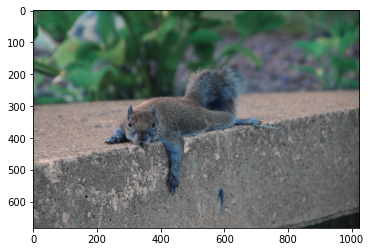

In [4]:
plt.imshow(img)
plt.show()

Does it look right? Does something seem a bit off about the colors? Let's investigate. It seems like some colors are swapped or maybe some weird filter is applied. We said the image was an array of numbers, how big is it?

**Step 5:** Let's convert the image into a NumPy Array and look at its shape.

(683, 1024, 3)
[77 93 82]


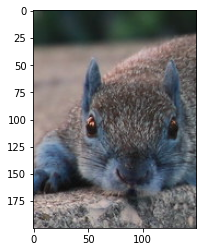

[[[ 77  93  82]
  [ 75  91  80]
  [ 74  87  79]
  ...
  [ 27  41  30]
  [ 26  40  29]
  [ 26  39  31]]

 [[ 76  93  80]
  [ 73  90  77]
  [ 71  87  76]
  ...
  [ 26  40  29]
  [ 28  39  29]
  [ 27  38  30]]

 [[ 74  91  78]
  [ 72  89  76]
  [ 69  85  74]
  ...
  [ 26  40  29]
  [ 27  38  28]
  [ 27  38  30]]

 ...

 [[102  98 104]
  [123 116 123]
  [154 147 150]
  ...
  [ 90  87  89]
  [ 88  89  93]
  [ 88  89  93]]

 [[112 107 108]
  [161 156 157]
  [148 143 144]
  ...
  [ 79  79  79]
  [ 82  82  82]
  [ 85  85  85]]

 [[135 130 131]
  [173 168 169]
  [182 177 178]
  ...
  [ 67  69  69]
  [ 68  70  70]
  [ 79  81  81]]]


In [ ]:
img = np.array(img)
print(img.shape)

face = img[250:450, 250: 400]

print(face[0, 0])

plt.imshow(face)
plt.show()

print(face)

Alright, it has 3 dimensions. The first two correspond to its size: height and width, but what about the 3rd dimension? Since our image is in color, it has 3 color channels: red, green, and blue. Let's look at the vlaues of a specific pixel, for example, the top left pixel. 

We do that using indexing. Indexing allows us to only take part of the array. We do this by looking at the pixel at the 0-th row, and 0-th column. 

In [ ]:
print(img[0, 0, 0:2])

[53 92]


So we can see that the colors have large values (53, 92, 67). As we mentioned, each channel corresponds to a color. More importantly, those colors have values that go from 0 to 255. The reason they have 256 values is that computers store information (including numbers) as bits, with each one being on or off. If you have 8-bits, you can represent 256 numbers. So if you want the maximum value of a channel, it should be 255, and if you want the minimum (no color) it will be 0. 

Alright, let's get back to investigating the weird colors that we're seeing. We can use indexing not just on pixel location, but also on color channels. In this case, we want to take every channel seperately. To do that, we say that we want all the rows and columns by using a colon instead of a number. For the 3rd dimension, we specific the number of the channel we care about. Remember that we start with zero! 

But it's hard to investigate with an image with a lot going on, let's get a simple color-wheel instead:![alt text](https://farm4.staticflickr.com/3575/3348347001_8c9e51bf3f.jpg)

**Step 6**: Download and display color wheel. 

--2020-07-17 15:43:32--  https://farm4.staticflickr.com/3575/3348347001_8c9e51bf3f.jpg
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 13.226.46.163, 2600:9000:21f2:8800:0:5a51:64c9:c681, 2600:9000:21f2:1c00:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘3348347001_8c9e51bf3f.jpg’

3348347001_8c9e51bf     [ <=>                ]  21.85K  --.-KB/s    in 0.009s  

2020-07-17 15:43:32 (2.43 MB/s) - ‘3348347001_8c9e51bf3f.jpg’ saved [22379]



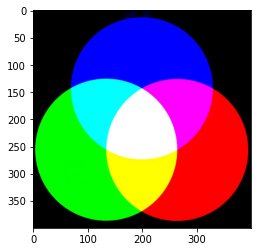

In [7]:
!wget https://farm4.staticflickr.com/3575/3348347001_8c9e51bf3f.jpg

color_wheel = cv2.imread('3348347001_8c9e51bf3f.jpg')

plt.imshow(color_wheel)
plt.show()

The color wheel doesn't match the normal image! Why is this happening? Well, it turns out that the people who made OpenCV liked one order of colors (Blue, Green, Red), while the people who made MatPlotlib liked another order (Red, Green, Blue). We can check this by splitting the image into the 3 channels, and plotting them separately. 

We can also get fancy and use colormaps. Those are color ranges that we can plot things in. For example, Blues plots small values as white, and large values as dark blue. 

**Step 7**: Split the image to 3 color channels, and plot them separately. 

In [ ]:
print(color_wheel.shape)

(400, 400, 3)


--2020-07-17 15:43:37--  https://farm6.staticflickr.com/5615/15585701596_767aa4783e.jpg
Resolving farm6.staticflickr.com (farm6.staticflickr.com)... 13.226.46.163, 2600:9000:21f2:6600:0:5a51:64c9:c681, 2600:9000:21f2:c000:0:5a51:64c9:c681, ...
Connecting to farm6.staticflickr.com (farm6.staticflickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘15585701596_767aa4783e.jpg.1’

15585701596_767aa47     [ <=>                ]  43.19K  --.-KB/s    in 0.02s   

2020-07-17 15:43:38 (1.92 MB/s) - ‘15585701596_767aa4783e.jpg.1’ saved [44226]



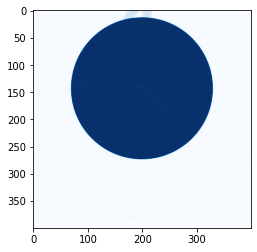

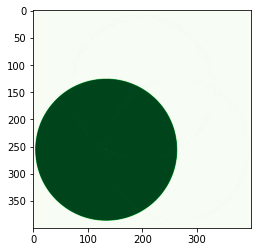

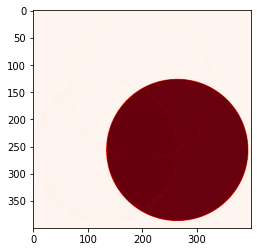

In [8]:
!wget https://farm6.staticflickr.com/5615/15585701596_767aa4783e.jpg
img = color_wheel
just_blue = img[:, :, 2]
just_green = img[:, :, 1]
just_red = img[:, :, 0]

plt.imshow(just_blue, cmap='Blues')
plt.show()
plt.imshow(just_green, cmap='Greens')
plt.show()
plt.imshow(just_red, cmap='Reds')
plt.show()

Now, we can see that this corresponds to the original image. We can flip the order of the color channels by using a list as our index. So we know that the third channels has its order flipped, so we can simply flip its order as well.

For reference, here's the original image: 

![alt text](https://farm4.staticflickr.com/3575/3348347001_8c9e51bf3f.jpg)


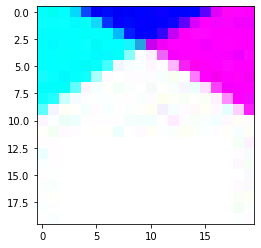

[[[  2 255 251]
  [  0 255 240]
  [  2 254 255]
  ...
  [255   5 248]
  [255   3 255]
  [255   0 255]]

 [[  9 254 255]
  [  5 255 255]
  [  6 255 255]
  ...
  [251   4 254]
  [243   0 254]
  [242   3 255]]

 [[  3 253 255]
  [  2 253 255]
  [  0 255 253]
  ...
  [255   0 255]
  [255   0 255]
  [252   0 255]]

 ...

 [[255 254 254]
  [255 255 252]
  [255 255 255]
  ...
  [255 255 255]
  [251 253 247]
  [253 255 247]]

 [[250 255 255]
  [255 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [243 255 245]
  [253 255 255]]

 [[255 254 255]
  [251 254 255]
  [255 255 255]
  ...
  [255 255 255]
  [253 255 254]
  [255 252 255]]]


In [ ]:
# plt.imshow(color_wheel)
# plt.show()

# color_wheel_fixed = color_wheel[:, :, [2, 1, 0]]
# plt.imshow(color_wheel_fixed)
# plt.show()

# blue_left = color_wheel_fixed[:, :, [2, 0, 1]]
# plt.imshow(blue_left)
# plt.show()


middle_part = color_wheel[140:160, 190: 210, :]
plt.imshow(middle_part)
plt.show()

print(middle_part)


Alright, well, that wasn't too bad. Let's get our squirrel image and fix it now. We'll load it again to make life easier. 

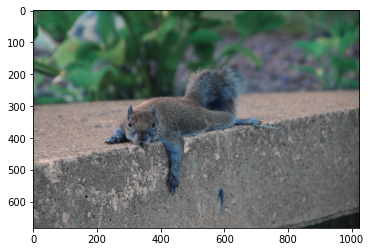

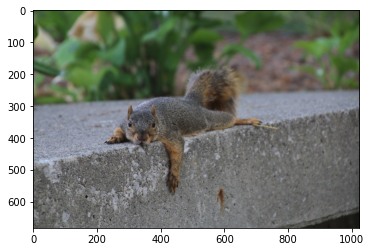

In [ ]:
squirrel_wrong = cv2.imread('squirrel.jpeg')

# change the indexing to correct the colors
squirrel = squirrel_wrong[:, :, [2, 1, 0]]

plt.imshow(squirrel_wrong)
plt.show()
plt.imshow(squirrel)
plt.show()

## Indexing a part of the image

So now we learned that images are loaded as 3-dimensional arrays, where the first dimension is height (or rows), the second dimension is width (or columns), and the third dimension is colors. We also learned how to use indexing to reverse the color channels and fix OpenCV's wonky input. 

Now we have this fabulous squirrel, and we'd like to change this full body image to a nice portrait. How can we crop the squirrel's face out? 

To do this, we can use indexing. This means we'd like to take a part of the image to create another image. For example, I can look at the image and see that the squirrel's full body starts from rows 150 to 600, and columns 200 till 750 or so. So I can index that part of the image as shown below. Notice that since I will use all the color channels, I can just leave it out since it's the last dimension. 

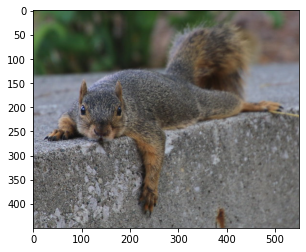

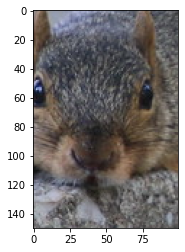

In [ ]:
squirrel_body = squirrel[150:600, 200:750]

plt.imshow(squirrel_body)
plt.show()

squirrel_face = squirrel_body[150:300, 100:200]
plt.imshow(squirrel_face)
plt.show()

Okay, so that works. What if we want to keep the full image, but we just want to make a frame around the squirrel. We can do this by changing the color values of specific pixels. To do this, we can directly set the value of a single pixel, or a whole range, using indexing as well. 

Here, I will put a red line under the squirrel. As we mentioned earlier, color values go from 0 to 255, so if we want a pixel to be red, we should set the red channel to be the maximum (255), and the green and blue channels to be 0.

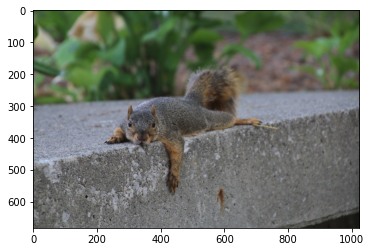

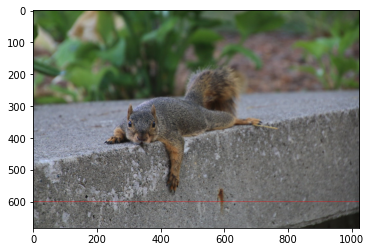

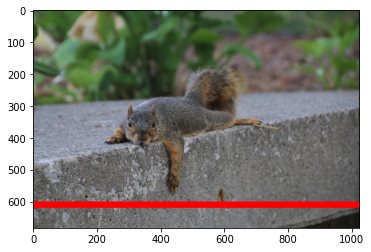

In [ ]:
plt.imshow(squirrel)
plt.show()

underlined_squirrel = squirrel

# the squirrel's hande is a little bit above row 600 in the original image.
underlined_squirrel[600, :] = [255, 0, 0]

plt.imshow(underlined_squirrel)
plt.show()

# that's a very thin line, we can set to a range of rows as well. 
underlined_squirrel[600:620, :] = [255, 0, 0]
plt.imshow(underlined_squirrel)
plt.show()

 ## Conclusion
 Wohoo!! You've reached this far. I want to emphasize how challenging and impressive this is. This notebook is almost identical to what a college senior taking Introduction to Computer Vision will do in their first assignment. So, great job on getting this far! 

 You have learned to load images, index them, fix weird color issues caused by engineers not playing nicely with each other, as well as manipulate them by cropping or changing the pixel colors. If you've got this far and still have time, I would encourage you to play with this for a while. Applications like photoshop or snapchat filters basically do similar manipulations like the ones you've learned, but have fancier algorithms to change the colors for them. 
 
 What can you do with those tools? Load an image you like, crop it, and change its colors in whatever way you wish. Save the notebook and show us your output next time. Feel free to add as many code blocks below, or create as many images as you want. 

(683, 1024, 3)


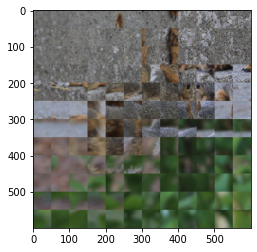

In [ ]:
# Load squirrel image
squirrel = cv2.imread('squirrel.jpeg')
print(squirrel.shape)
img = np.array(squirrel)[:600, 200: 800, [2, 1, 0]]
new_img = np.array(img)

h, w, _ = img.shape

X = 50
check = True

for i in range(0, h, X):
  for j in range(0, w, X):
    if check:
      new_img[i:i+X, j:j+X] = img[h-i-X:h-i, w-j-X:w-j]
      check = False
    else:
      new_img[i:i+X, j:j+X] = img[h-i-X:h-i, w-j-X:w-j]
      check = True


plt.imshow(new_img)
plt.show()